D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log


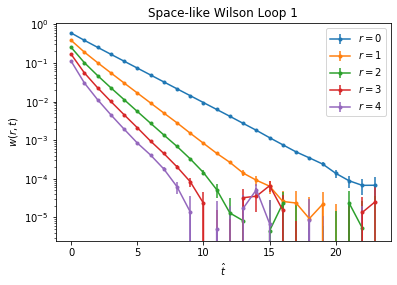

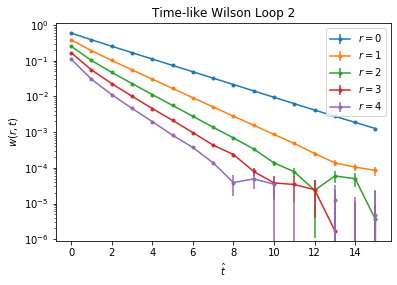

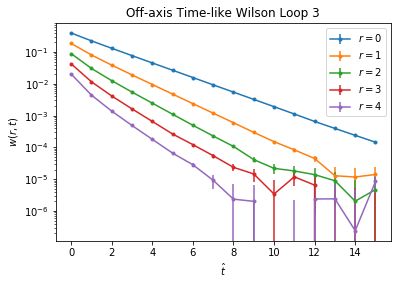

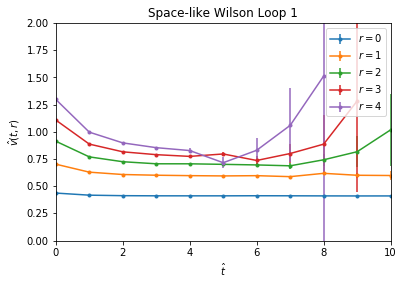

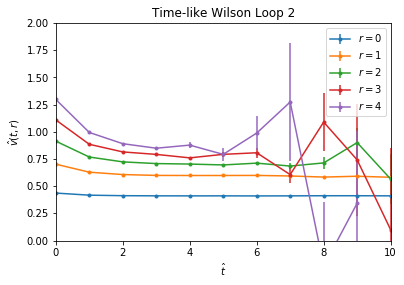

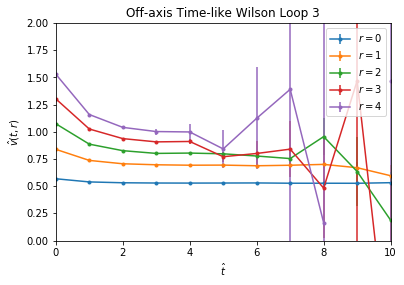

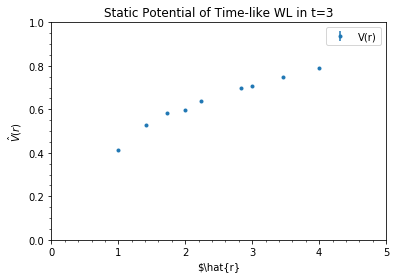

Least Square Fit (no prior):
  chi2/dof [dof] = 72 [27]    Q = 0    

Parameters:
              0    0.6623 (15)      [ 0.5 +- inf ]  
              1   -0.3018 (12)      [ 0.5 +- inf ]  
              2   0.05294 (39)      [ 0.5 +- inf ]  
              3   0.87420 (61)      [ 0.5 +- inf ]  
              4   0.62941 (41)      [ 0.5 +- inf ]  
              5   0.45101 (35)      [ 0.5 +- inf ]  
              6   0.64932 (53)      [ 0.5 +- inf ]  
              7   0.43550 (37)      [ 0.5 +- inf ]  
              8   0.32161 (32)      [ 0.5 +- inf ]  
              9   0.40807 (45)      [ 0.5 +- inf ]  
             10   0.16183 (22)      [ 0.5 +- inf ]  
             11   0.24860 (49)      [ 0.5 +- inf ]  
             12   0.14490 (31)      [ 0.5 +- inf ]  
             13   0.12505 (29)      [ 0.5 +- inf ]  
             14   0.15019 (50)      [ 0.5 +- inf ]  
             15   0.05156 (16)      [ 0.5 +- inf ]  
             16   0.06305 (24)      [ 0.5 +- inf ]  
             17  

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import gvar
import lsqfit

def main():

    def Jackknife(data):
        data_resamp = np.zeros_like(data)
        for nrow in range(data.shape[0]):
            cols_extracted = np.concatenate((data[:nrow,:,:], data[nrow+1:,:,:]), axis=0)
            data_resamp[nrow,:,:] = np.average(cols_extracted, axis=0)
        return data_resamp

    def getMeanErr(data, ifJack):
        mean = np.mean(data,axis=0)
        if(ifJack==0):
            err = np.std(data,axis=0)/np.sqrt(data.shape[0]-1)
        else: # Jackknife
        #    data_resamp = Jackknife(data)
            err = np.std(data,axis=0)*np.sqrt(data.shape[0]-1)
        return mean, err

    def static_p(data):
        vr = np.log(data[:, :-1, :]/data[:, 1:, :])
        return vr

    def sortseq(data3, data2=None):
        data3mean, data3err = getMeanErr(data3, 1)
        if data2 is not None:
            data2mean, data2err = getMeanErr(data2, 1)
            rseries = np.concatenate((np.arange(1,25),np.sqrt(2)*np.arange(1,25),np.sqrt(5)*np.arange(1,13),np.sqrt(3)*np.arange(1,25)))
            dataseries = np.concatenate((data2mean,data3mean),axis=1)
            errseries = np.concatenate((data2err,data3err),axis=1)
            rsort = np.argsort(rseries)
            rseries = rseries[rsort]
            dataseries = dataseries[:,rsort]
            errseries = errseries[:,rsort]
        else:
            rseries = np.concatenate((np.sqrt(2)*np.arange(1,25),np.sqrt(5)*np.arange(1,13),np.sqrt(3)*np.arange(1,25)))
            dataseries = np.concatenate((data2mean,data3mean),axis=1)
            errseries = np.concatenate((data2err,data3err),axis=1)
            rsort = np.argsort(rseries)
            rseries = rseries[rsort]
            dataseries = dataseries[:,rsort]
            errseries = errseries[:,rsort]

        return rseries, dataseries, errseries, rsort



    def drawwlp(data, rlist, name):
        tleng = np.shape(data)[1]
        t = np.arange(tleng)

        datamean, dataerr = getMeanErr(data, 1)

        ax = plt.axes(yscale = 'log')

        for r in rlist:
            plt.errorbar(t,datamean[:,r],yerr=dataerr[:,r],fmt='.-',label="$r="+str(r)+"$")

        plt.legend(loc='upper right')
        plt.xlabel("$\\hat{t}$")
        plt.ylabel("$w(r,t)$")
        plt.title(name)
        plt.show()
        plt.close()

        return 0

    def drawStPo(data, rlist, name):    # draw static potential
        tleng = np.shape(data)[1]
        t = np.arange(tleng)

        datamean, dataerr = getMeanErr(data, 1)

        for r in rlist:
            plt.errorbar(t,datamean[:,r],yerr=dataerr[:,r],fmt='.-',label="$r="+str(r)+"$")

        plt.xlim(0,10)
        plt.ylim(0,2)
        plt.legend(loc='upper right')
        plt.xlabel("$\\hat{t}$")
        plt.ylabel("$\\hat{v}(t,r)$")
        plt.title(name)
        plt.show()
        plt.close()

        return 0

    def drawVrPoint(data, t, rlim, name): ## function for wilson loop 1 and 2
        datamean, dataerr = getMeanErr(data, 1)
    #    rlen = np.shape(datamean)[1]
        r = np.arange(rlim)
        plt.errorbar(r, datamean[t, :rlim], yerr=dataerr[t, :rlim], fmt='.', label="$V(r)$")
        plt.title(name)
        plt.xlabel("$\\hat{r}$")
        plt.ylabel("$\\hat{V}(r)$")
        plt.legend(loc='upper right')

        plt.show()
        plt.close()

        return 0
    
    topiclist = ["Space-like Wilson Loop 1", "Time-like Wilson Loop 2", "Off-axis Time-like Wilson Loop 3"]

    wl1data = np.loadtxt("wilsonloop1_100conf.txt").reshape((-1,24,24))
    wl2data = np.loadtxt("wilsonloop2_100conf.txt").reshape((-1,16,24))
    wl3data = np.loadtxt("wilsonloop3_100conf.txt").reshape((-1,16,60))
    
    for i in range(1,4):
        exec('wl{}_resamp = Jackknife(wl{}data)'.format(i,i),locals())
        exec('wl{}st = static_p(wl{}_resamp)'.format(i,i),locals())
    
    varnames = locals()
#    print(wl1data)
    for i in range(1,4):
        drawwlp(varnames['wl'+str(i)+'_resamp'],np.arange(5),topiclist[i-1])

    for i in range(1,4):
        drawStPo(varnames['wl'+str(i)+'st'],np.arange(5),topiclist[i-1])

#    for i in range(1,3):
#        drawVrPoint(varnames['wl'+str(i)+'st'],3,6,"Static potential of "+topiclist[i-1])

    # for analysis of time-like WL
    rseq, Vr, Vrerr, rsort = sortseq(varnames['wl3st'],varnames['wl2st'])

    plt.figure()
    chosent = 3
    rlen = 9
    plt.title("Static Potential of Time-like WL in t="+str(chosent))
    plt.xlabel("$\\hat{r}")
    plt.ylabel("$\\hat{V}(r)$")
    plt.xlim((0,5))
    plt.ylim((0,1))
    plt.minorticks_on()
    plt.errorbar(rseq[:rlen],Vr[chosent,:rlen],yerr=Vrerr[chosent,:rlen],fmt='.',label="V(r)")
    plt.legend(loc='upper right')
    plt.show()
    plt.close()

    fitdata = np.concatenate((wl2data,wl3data),axis=2)
    fitdata = fitdata[:,:,rsort]

    def fit_Vr(p):
        nonlocal choice_t, choice_r
        t = choice_t.reshape(-1,1)
        r = choice_r.reshape(1,-1)
        vr = p[0] + p[1]/r + p[2]*r
        ans = p[3:].reshape(1,-1)*np.exp(-t * vr)
        return ans

    fitdmean, fitderr = getMeanErr(fitdata,0)
    fitd = gvar.gvar(fitdmean,fitderr)

#    nconf = fitdata.shape[0]
#    fitd=gvar.gvar(np.average(fitdata.reshape(nconf,-1),axis=0),(np.cov(fitdata.reshape(nconf,-1),rowvar=False))).reshape(fitdata.shape[1:])
    
    choice_t = np.arange(3,6)
    choice_r = rseq[:15]
    p0=[0.5 for i in range(3 + len(choice_r))]
    fit = lsqfit.nonlinear_fit(data = fitd[choice_t-1,:len(choice_r)],fcn=fit_Vr,p0=p0)
    r0 = np.sqrt((1.65+fit.p[1])/fit.p[2])
    a =  0.5 / r0

    print(fit)
    print("lattice length = "+str(a))

    return 0





if __name__ == "__main__":
    main()

